### Introduction
This project explores the strategies for constructing network structures from text data

###  1) Building a network from the raw text data
First, let’s start with a question to answer:

Research question: what terminology is shared between research fields in journal article titles?

Research Articles Dataset from Kaggle containing abstracts for journal articles on six topics (Computer Science, Mathematics, Physics, Statistics, Quantitative Biology, and Quantitative Finance) is a great option to illustrate coding in Python.

### Importing the Libraries
Textnets has been developed as a result of Bail’s (2016) PNAS paper. It exists both in Python and R implementations. By default, it uses the Leiden algorithm for community detection in text data. This group of algorithms helps discover the structure of large and complex networks and identify groups of nodes that are connected among themselves but sparsely connected to the rest of the network (see Traag et al., 2019, Yang et al., 2016).

### Implementation
Let’s see how it works. First, we import Textnets and Pandas, and read the data. It is important to set index_col='research_field' to draw the graph correctly

In [1]:
import textnets as tn
from textnets import Corpus
import pandas as pd

### Importing the Data

In [2]:
# Data import
data1 = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Text Network Analysis\research_articles_subset.csv', index_col='research_field')
data1.head()

,title
research_field,
Computer Science,Reconstructing Subject-Specific Effect Maps
Computer Science,Rotation Invariance Neural Network
Computer Science,A global sensitivity analysis and reduced orde...
Computer Science,On Varieties of Ordered Automata
Computer Science,Diffraction-Aware Sound Localization for a Non...


Next, we build the corpus from the column of article titles. We use a subset representing 10 article titles from each research field to make the network for illustration simpler.

In [3]:
corpus = Corpus(data1['title'])

Textnets then removes stop words, applies stemming, removes punctuation marks, numbers, URLs, and the like, and creates a text network. mind_docs specifies the minimum number of documents a term must appear in to be included in the network.

In [4]:
t = tn.Textnet(corpus.tokenized(), min_docs=1)

Now, let’s plot the network. The show_clustersoptions marks the partitions found by the Leiden detection algorithm. It identifies document–term groups that appear to form part of the same theme in the texts.

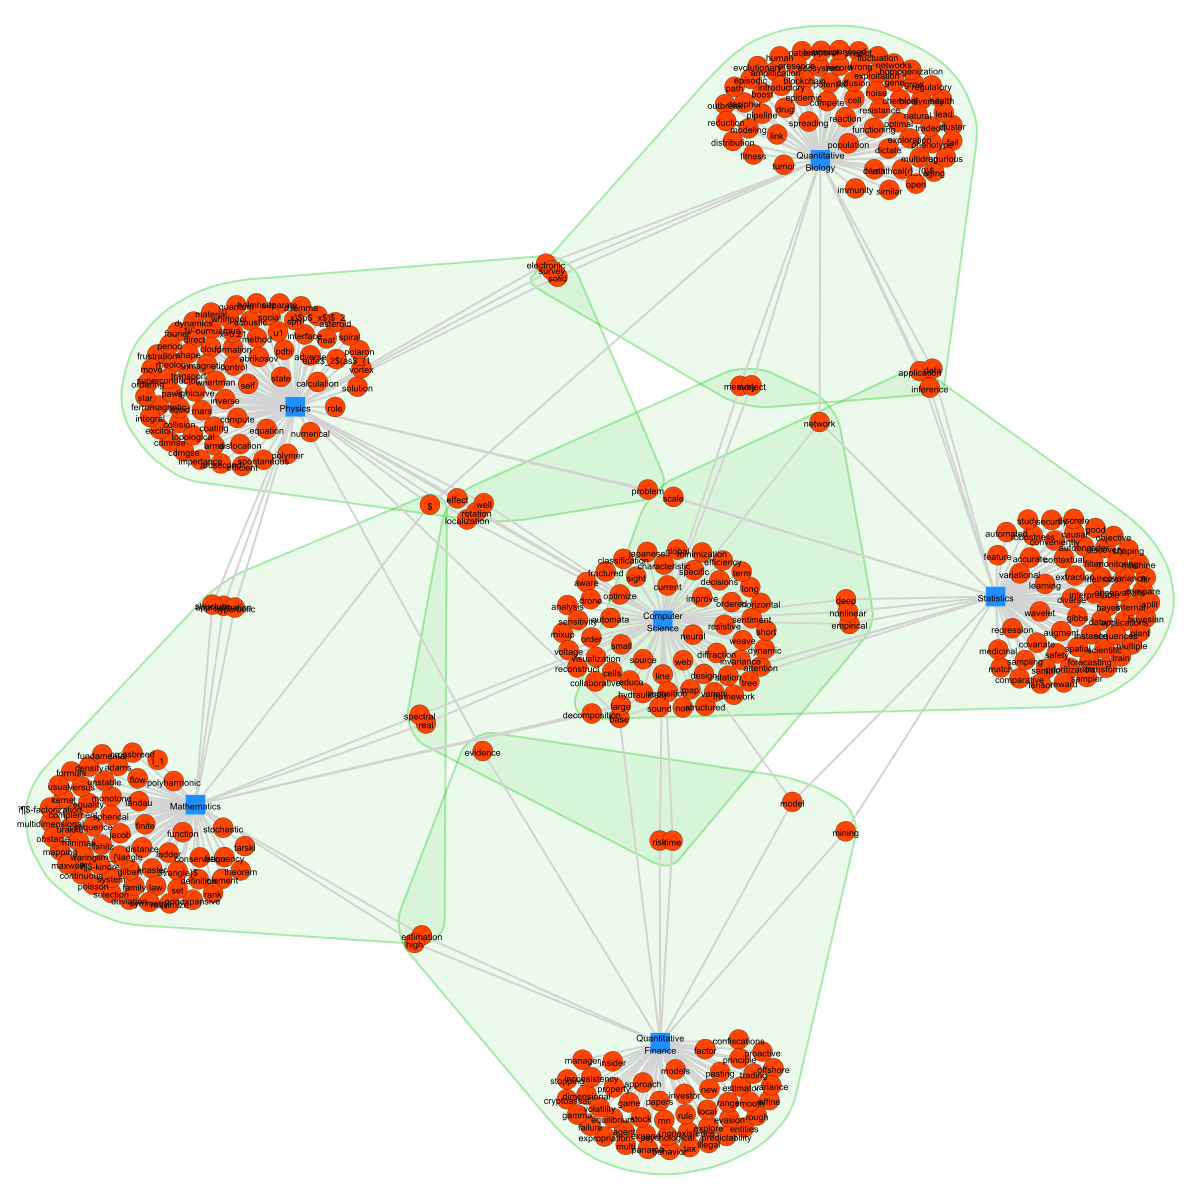

In [5]:
t.plot(label_nodes=True,show_clusters=True,bbox=(1200, 1200))

### Findings
We can clearly distinguish keywords that are shared by more than one research field. These are, e.g., “time” and “risk” (Quantitative Finance — Computer science), “deep” and “empirical” (Mathematics — Statistics — Computer Science), — Mathematics), or “subject” and “memory” (Quantitative Biology — Computer Science).

These findings strongly depend on the sample size. The richer dataset we have, the more precise results we obtain. We can draw the network structure in many other ways, depending on the research question we set at the beginning.

### 2) Constructing a network from the nodes-edges structure

We can work with data with a clear nodes-edges structure that often involves cleaning and pre-processing. To explore possible scenarios, let’s use the IMDb 50K Movie Reviews dataset, which contains movie reviews, and their evaluated sentiment (positive/negative).

NetworkX is a Python library for the creation and study of complex networks. It is a highly developed package containing extensive documentation that draws networks in many tutorials and e-books. Hagberg et al. (2008), who co-authored the package, present the inner NetworkX structure. It can display various network structures; text data usually require some transformation to serve as the input.

Text networks are often used to display keyword co-occurrences in a text (Shim et al., 2015; Krenn and Zeilinger, 2020, and many others). We will use the same approach, and, as an example use case, we are interested in the associations of movie reviewers to the famous Matrix film.

The data consists of two sets of nodes: the monitored movie title (Matrix) and a group of selected movie titles that reviewers may associate with Matrix. Edges are represented by co-occurrences of the nodes in the same review. The edge only exists if a reviewer mentions the monitored and an associated movie title in the same review.

### The research question: which popular sci-fi movies are primarily associated with Matrix?

### Importing the Data

In [6]:
# reading pre-processed data
import pandas as pd

data2 = pd.read_excel(r'C:\Users\SHREE\Downloads\Python CODES\Text Network Analysis\data_matrix.xlsx')
data2=data2[['node1','node2']]
data2.head()

,node1,node2
0,Matrix,Terminator
1,Matrix,Tron
2,Matrix,Animatrix
3,Matrix,Tron
4,Matrix,Moon


### Implementation
After reading the data, let’s do some simple transformation and exploratory steps that helps us to understand the graph and plot it propperly.

### Calculate edge size
To quantify edges, we create a separate column edge_width in our data with the size for every edge in the node2 column.

In [7]:
data2 = data2.groupby(['node2'],as_index=False).count()
data2.columns=['node2','edge_width']
data2['node1']='Matrix'

### Create the graph and print the nodes and edges to prevent possible misinterpretations

In [8]:
import networkx as nx

# greate graph from data frame
G = nx.from_pandas_edgelist(data2, 'node1', 'node2')

# printing nodes and edges of the graph
list(G.nodes)
list(G.edges)

# get the number of nodes and edges
G.number_of_nodes()
G.number_of_edges()

14

### Plot a network chart

After a brief inspection that no unexpected errors occur, we move on, shape the original G graph into a star graph, keep the properties of the graph in options, and plot it with matplotlib.

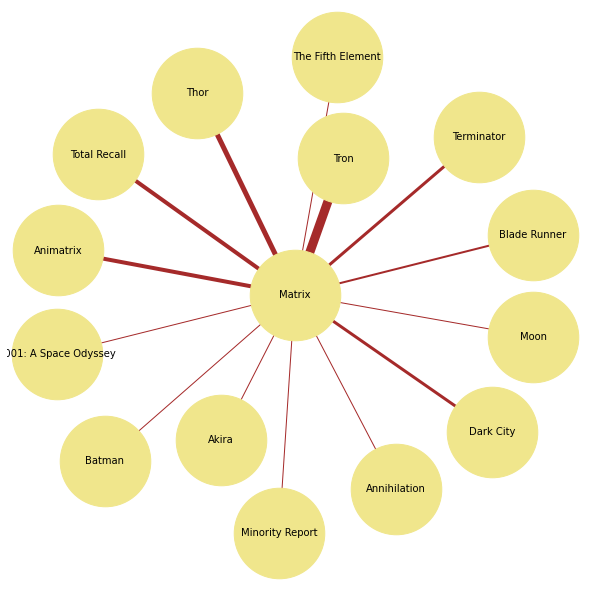

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

l = nx.star_graph(G)
pos = nx.spring_layout(l, seed=63)  # Seed layout for reproducibility

options = {
    "node_color": "khaki",
    "edge_color": "brown",
    "width": data2.edge_width,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    "node_size": 8200,
    "font_size": 10
}
nx.draw(l,
        pos,
        **options)

plt.show()

### Findings: 
The data is not very rich for movie titles, but the network analysis suggests that the reviewer’s mostly associate Matrix with Thor and Tron. It seems obvious after a brief data inspection with such a small dataset. Imagine, however, that you have a larger dataset with a considerable volume of nodes. Here, network analysis greatly helps to describe the dataset.